# COVID-19 Brasil - Análise de Dados

## 1. Conteúdo

O seguinte *notebook* é resultado de uma análise exploratória aos dados da COVID-19 no Brasil. Foram feitas várias observações e considerações sobre os dados, assim como uma previsão da incidência do vírus através de modelos de aprendizagem máquina, nomeadamente de regressão.

O conteúdo do *notebook* está dividido em várias alíneas, respetivamente:
- Definição das Variáveis
- Análise Exploratória dos Dados
- Modelos de Aprendizagem Máquina

O *dataset* utilizado foi retirado da plataforma *kaggle* no link: 

https://www.kaggle.com/unanimad/corona-virus-brazil

Este contém informação do Ministério da Saúde Brasileiro, acerca do número de casos de infeções e óbitos ao longo dos dias, organizados por estado e região. Existem entradas de dados desde o surgimento do primeiro caso suspeito no Brasil, que foi a 30/01/2020.

In [87]:
import sys

!conda install --yes --prefix {sys.prefix} pandas
!conda install --yes --prefix {sys.prefix} numpy
!conda install --yes --prefix {sys.prefix} nbformat
!conda install --yes --prefix {sys.prefix} plotly==4.6.0
!conda install --yes --prefix {sys.prefix} psutil requests
!conda install --yes --prefix {sys.prefix} scikit-learn
!conda install --yes --prefix {sys.prefix} -c plotly plotly-orca==1.2.1 psutil requests

done

# All requested packages already installed.

Sdone

# All requested packages already installed.

done

# All requested packages already installed.

done

# All requested packages already installed.

Solvdone

# All requested packages already installed.

Solvdone

# All requested packages already installed.

Solvidone

# All requested packages already installed.



In [88]:
import numpy as np
import pandas as pd
import plotly.io as pio
import plotly.graph_objects as go
from plotly.graph_objs import *
from plotly.subplots import make_subplots
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import datetime

import warnings
warnings.filterwarnings('ignore')

pio.renderers.default = "svg"

# Ler os dados
data = pd.read_csv('./brazil_covid19.csv')

## 2. Definição das Variáveis


In [89]:
# Últimas 5 entradas do dataset
print("Tail do Dataset:\n", data.tail())

Tail do Dataset:
             date   region              state  cases  deaths
1837  2020-05-20  Sudeste     Rio de Janeiro  30372    3237
1838  2020-05-20  Sudeste          São Paulo  69859    5363
1839  2020-05-20      Sul             Paraná   2616     137
1840  2020-05-20      Sul  Rio Grande do Sul   4973     161
1841  2020-05-20      Sul     Santa Catarina   5499      94


É de notar que este *dataset* contém os dados numa série temporal, ou seja, o número de casos num determinado dia é cumulativo.


Temos no total 5 variáveis:
- **date**: Representa a data (YYYY-MM-DD) para cada entrada, sendo que existem várias entradas com a mesma data, relativas a diferentes estados.
- **region**: Representa a região do país relativa ao estado, para cada entrada.
- **state**: Representa o estado brasileiro a que se refere cada entrada de dados.
- **cases**: Representa o nº de casos confirmados de infeção.
- **deaths**: Representa o nº de óbitos confirmados.

Apresenta-se a descrição das variáveis contínuas **cases** e **deaths**:

In [90]:
data.describe()

,cases,deaths
count,1842.000000,1842.000000
mean,2474.680239,164.432139
std,6363.967745,514.934458
min,1.000000,0.000000
25%,47.000000,1.000000
50%,430.500000,15.000000
75%,1875.500000,72.000000
max,69859.000000,5363.000000


De seguida, são listados os valores possíveis para as nossas variáveis categóricas, que são respetivamente os nomes de todas as regiões e estados.

In [91]:
# Lista de regiões do dataset
print("\nRegions: ", data.region.unique())

# Lista de estados do dataset
print("\nStates: ", data.state.unique())


Regions:  ['Sudeste' 'Nordeste' 'Centro-Oeste' 'Sul' 'Norte']

States:  ['São Paulo' 'Rio de Janeiro' 'Bahia' 'Espírito Santo' 'Distrito Federal'
 'Alagoas' 'Minas Gerais' 'Rio Grande do Sul' 'Pernambuco' 'Paraná'
 'Goiás' 'Rio Grande do Norte' 'Santa Catarina' 'Sergipe' 'Amazonas'
 'Mato Grosso do Sul' 'Ceará' 'Paraíba' 'Acre' 'Pará' 'Tocantins'
 'Mato Grosso' 'Piauí' 'Amapá' 'Rondônia' 'Maranhão' 'Roraima']


Como podemos ver, não existem quaisquer valores nulos para todas as 5 colunas do *dataset*. Logo não é necessário qualquer tratamento de dados extra.


In [92]:
# Verificar valores nulos
print("Null Values:\n", data.isnull().sum())

Null Values:
 date      0
region    0
state     0
cases     0
deaths    0
dtype: int64


## 3. Análise Exploratória dos Dados

Neste capítulo são feitas algumas avaliações e visualizações analíticas acerca dos dados.

Começando pelo cálculo do nº de dias já passado, de modo a termos uma noção do período de tempo da análise.

In [93]:
# Nº de dias desde primeira entrada de dados
print("Number of Days Passed: ", data.date.unique().size)

Number of Days Passed:  85


In [94]:
# Primeiro caso de infeção
data[data['cases'] > 0].head(1)

,date,region,state,cases,deaths
0,2020-02-26,Sudeste,São Paulo,1,0


O primeiro caso de infeção confirmado no país deu-se no dia 26 de fevereiro, mais precisamente no estado de São Paulo.

In [95]:
# Primeira morte
data[data['deaths'] > 0].head(1)

,date,region,state,cases,deaths
129,2020-03-17,Sudeste,São Paulo,164,1


A primeira morte por infeção do vírus, foi confirmada no dia 17 de março, novamente no estado de São Paulo.

Foi feito o gráfico da curva epidemiológica do vírus ao longo deste perído de tempo, em termos de casos confirmados.

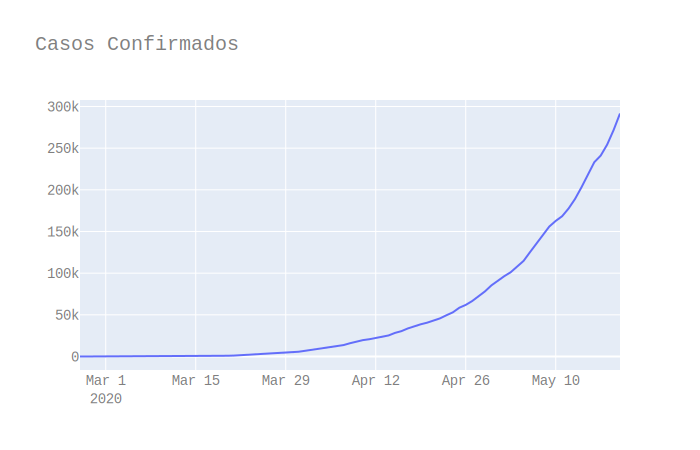

In [96]:
# Somar casos e mortes e juntar por dia
data_by_day = data.groupby(['date'])['cases','deaths'].agg('sum')

# Plot
layout = Layout(
    title="Casos Confirmados",
    font=dict(
        family="Courier New, monospace",
        size=14,
        color="#7f7f7f"
    )
)

fig = go.Figure(data=go.Line(x = data_by_day.index, y=data_by_day['cases']))

fig['layout'].update(layout)

fig.show()



Por conseguinte, realizou-se também o gráfico que demonstra o aumento do nº de óbitos durante este período.

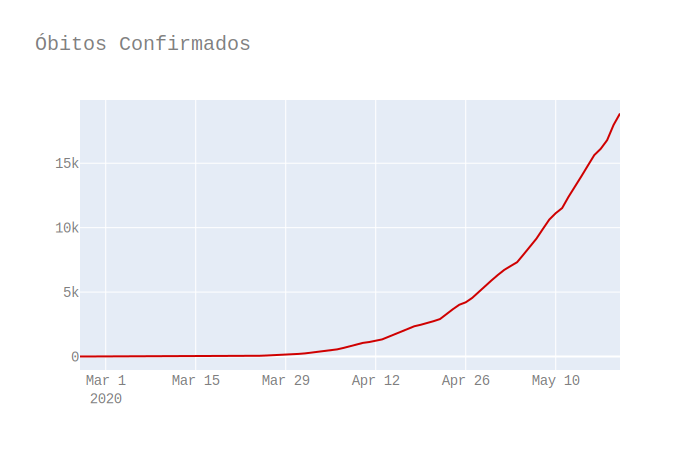

In [97]:
# Plot
layout = Layout(
    title="Óbitos Confirmados",
    font=dict(
        family="Courier New, monospace",
        size=14,
        color="#7f7f7f"
    )
)

fig = go.Figure(data=go.Line(x = data_by_day.index, y=data_by_day['deaths'], line_color='#cf0000'))

fig['layout'].update(layout)

fig.show()

Averíguamos agora através de gráficos de barras, qual tem sido o aumento diário de casos positivos e de óbitos no país.

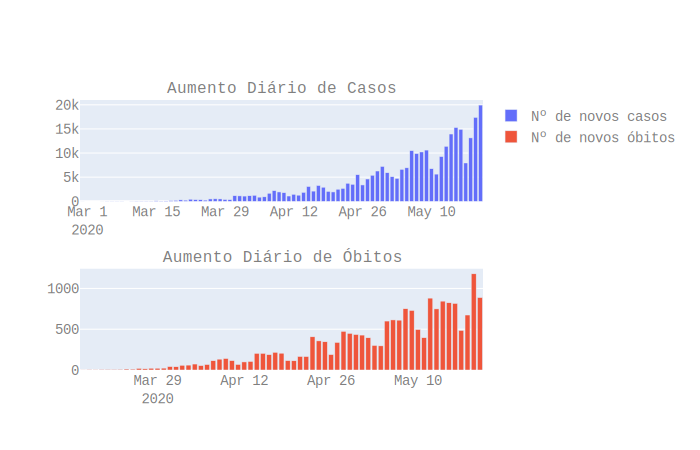

In [98]:
# Cálculo da taxa diária de casos e mortes
data_today = data_by_day
data_before = data_by_day.shift(1)

data_growth_rate = data_today - data_before
data_growth_rate = data_growth_rate.dropna()

cases_rate = data_growth_rate['cases'][data_growth_rate['cases']>0]
deaths_rate = data_growth_rate['deaths'][data_growth_rate['deaths']>0]

# Plot
layout = Layout(
    font=dict(
        family="Courier New, monospace",
        size=14,
        color="#7f7f7f"
    )
)

fig = make_subplots(rows=2, cols=1
                    , subplot_titles=('Aumento Diário de Casos'
                                      , 'Aumento Diário de Óbitos'))

fig.append_trace(Bar(
    x=cases_rate.index,
    y=cases_rate,
    name='Nº de novos casos'
), row=1, col=1)

fig.append_trace(Bar(
    x=deaths_rate.index,
    y=deaths_rate,
    name='Nº de novos óbitos'
), row=2, col=1)

fig['layout'].update(layout)

fig.show()

Conseguimos ver que quanto ao gráfico da taxa de novos casos, até recentemente continua a aumentar o recorde diário de casos. Isto pode indicar vários fatores, nomeadamente o aumento da realização de testes.

Quanto ao gráfico da taxa de novos óbitos, é normal que acompanhe a tendência do primeiro. Pois quantas mais pessoas ficam infetadas, mais o nº diário de óbitos irá aumentar.

Na computação seguinte é investigada a divisão dos dados por estados, em termos de casos e óbitos.

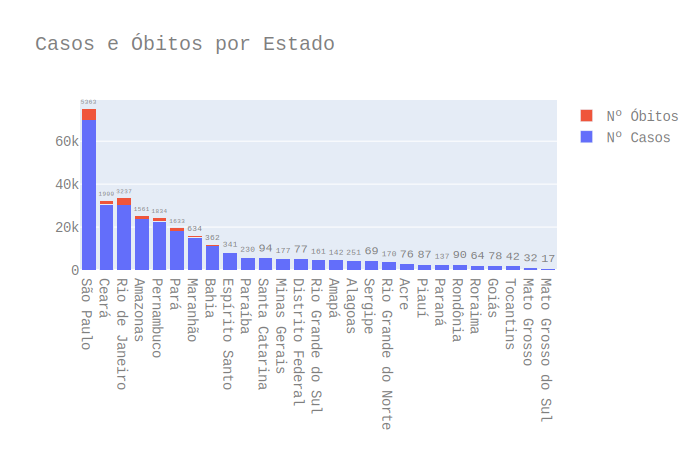

In [99]:
# Data mais recente do dataset
last_date = data['date'].tail(1).item()

# Casos e mortes por estado, para a última data do dataset
data_by_state = data[['cases','deaths']][data['date']==last_date].groupby(data['state']).sum().sort_values(by = 'cases', ascending=False)

# Plot
layout = Layout(
    title="Casos e Óbitos por Estado",
    font=dict(
        family="Courier New, monospace",
        size=14,
        color="#7f7f7f"
    ),
    height=600
)

fig = go.Figure(data=[
    
    go.Bar(name='Nº Casos'
           , x=data_by_state.index
           , y=data_by_state['cases']
           ),
    
    go.Bar(name='Nº Óbitos'
           , x=data_by_state.index
           , y=data_by_state['deaths']
           , text=data_by_state['deaths']
           , textposition='outside')
])

fig.update_layout(barmode='stack')
fig['layout'].update(layout)

fig.show()

O gráfico de barras é feito de forma a que no topo de cada barra, tenha uma *label* com o nº de óbitos, para uma melhor visualização.

Como podemos ver, atualmente os 3 estados com maior nº de infetados são São Paulo, Rio de Janeiro e Ceará. Estes também concentram entre si, como é natural, o maior nº de mortes do Brasil.

Depois de visualizarmos o efeito do vírus em diferentes aspetos, em seguida calculámos a sua taxa de letalidade nos infetados. Este dado é conseguido através da seguinte expressão:

$$
\textrm{Taxa de letalidade} =  \frac{\sum \textrm{óbitos}}{\sum \textrm{casos}}
$$

In [100]:
# Cálculo da taxa de letalidade
rate = sum(data_growth_rate['deaths'])/sum(data_growth_rate['cases'])

print("Taxa de letalidade no dia",last_date,": {0:.2f}%".format(rate*100))

Taxa de letalidade no dia 2020-05-20 : 6.47%


## 4. Modelos

### Regressão Linear

O primeiro modelo a aplicar aos dados será uma simples regressão linear, de modo a podermos analisar qual vai ser o seu comportamento na previsão do nº de casos.

Primeiro, é necessário preparar os dados para a regressão. Definiu-se que o *holdout* seria realizar o treino com 90% dos dados (90% desde primeiro dia) e o teste com os 10% dias restantes.


In [101]:
df1 = data_by_day
df1 = df1.reset_index()

# Filtrar desde primeiro caso
df1 = df1.loc[df1['date'] >= '2020-02-26']

# Inserir coluna de dias
df1['days'] = range(1, len(df1) + 1)


# Treino
days_train = df1['days'][:int(0.9*len(df1))]
cases_train = df1['cases'][:int(0.9*len(df1))]

# Teste
days_test = df1['days'][int(0.9*len(df1)):]
cases_test =  df1['cases'][int(0.9*len(df1)):]

estimate = len(df1) - len(days_test)

print("Total Dados: %d, Treino: %d dias, Teste: %d dias" % (len(df1),len(days_train),len(days_test)))

Total Dados: 85, Treino: 76 dias, Teste: 9 dias


Tendo o *holdout* definido, passamos à computação do modelo com os dados de treino, e a respetiva previsão com os dados de teste. 

É feito um gráfico de modo a podermos visualizar esta estimativa, e no final são calculadas as métricas do Erro Médio Quadrático e do coeficiente R^2, para avaliar o modelo.

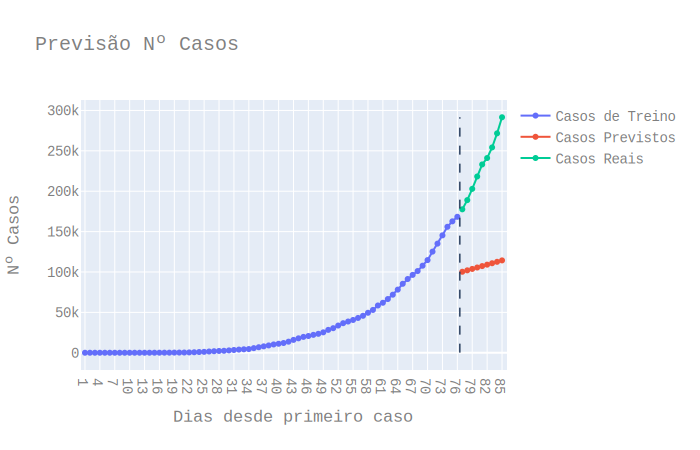

In [102]:
# Regressão Linear
reg = LinearRegression().fit(days_train.values.reshape(-1,1), cases_train)
cases_estimate = reg.predict(days_test.values.reshape(-1,1))

# Plot
layout = Layout(
    font=dict(
        family="Courier New, monospace",
        size=14,
        color="#7f7f7f"
    ),
    title= "Previsão Nº Casos",
    xaxis_title="Dias desde primeiro caso",
    yaxis_title="Nº Casos",
    xaxis = dict(
        tickmode = 'linear',
        tick0 = 1,
        dtick = 3,
        range=[0,len(df1)+1]
    )
)

fig = go.Figure(data=[
    go.Scatter(x=days_train, y=cases_train, name='Casos de Treino',mode="lines+markers"),
    go.Scatter(x=days_test, y=cases_estimate, name = 'Casos Previstos',mode="lines+markers"),
    go.Scatter(x=days_test, y=cases_test, name = 'Casos Reais',mode="lines+markers")
])

fig.add_shape(
        dict(
            type="line",
            x0=estimate + 0.5,
            y0=120,
            x1=estimate + 0.5,
            y1=max(df1['cases']),
            line=dict(
                width=1.5,
                dash= "dash"
            )
))

fig['layout'].update(layout)
fig.show()

In [103]:
print("Erro Médio Quadrático: ",mean_squared_error(cases_test,cases_estimate))
print("Coeficiente R^2: ", r2_score(cases_test,cases_estimate))

Erro Médio Quadrático:  16287020518.579288
Coeficiente R^2:  -11.705960263427409


Ao analisar o gráfico, repara-se que o modelo subestima muito o nº de casos em relação ao nº real.

Torna-se assim claro que não existe forma de uma regressão linear prever bem o formato do crescimento de casos. 